
==== Árvore de Decisão ====
Acurácia: 0.8357
F1-score: 0.837

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      4906
           1       0.83      0.84      0.84      4900

    accuracy                           0.84      9806
   macro avg       0.84      0.84      0.84      9806
weighted avg       0.84      0.84      0.84      9806



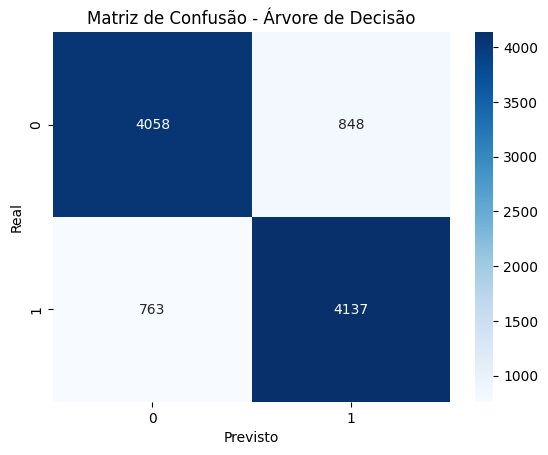


==== KNN ====
Acurácia: 0.848
F1-score: 0.8407

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      4906
           1       0.88      0.80      0.84      4900

    accuracy                           0.85      9806
   macro avg       0.85      0.85      0.85      9806
weighted avg       0.85      0.85      0.85      9806



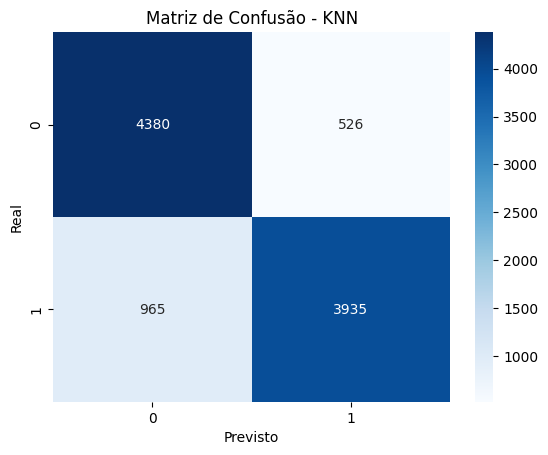


==== Regressão Logística ====
Acurácia: 0.797
F1-score: 0.7883

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80      4906
           1       0.82      0.76      0.79      4900

    accuracy                           0.80      9806
   macro avg       0.80      0.80      0.80      9806
weighted avg       0.80      0.80      0.80      9806



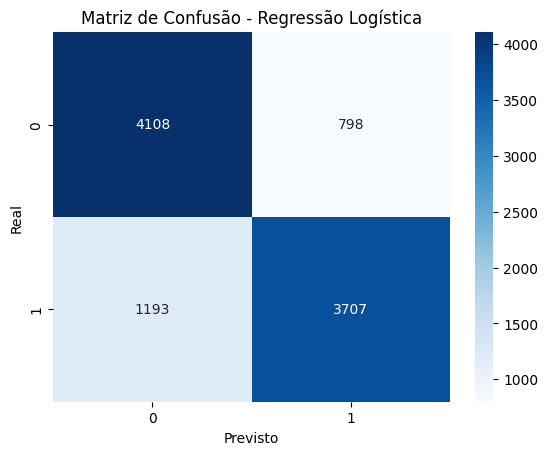


Comparação de Modelos:

                Modelo  Acurácia  F1-score
0    Árvore de Decisão  0.835713  0.837026
1                  KNN  0.847950  0.840722
2  Regressão Logística  0.796961  0.788304


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset
df = pd.read_csv("/content/SolarPrediction.csv")

# Criar uma variável alvo baseada na radiação (acima ou abaixo da mediana)
thr = df["Radiation"].median()
df["Target"] = (df["Radiation"] > thr).astype(int)  # 1 para alta radiação (instável), 0 para baixa (estável)

# Separar features e alvo
X = df.drop(columns=["Target", "Radiation", "Time", "Data", "TimeSunRise", "TimeSunSet", "UNIXTime"])  # Remover colunas não relevantes
y = df["Target"]

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos
modelos = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42)
}

resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    resultados.append([nome, acc, f1])

    print(f"\n==== {nome} ====")
    print("Acurácia:", round(acc, 4))
    print("F1-score:", round(f1, 4))
    print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

# Tabela comparativa
resultados_df = pd.DataFrame(resultados, columns=["Modelo", "Acurácia", "F1-score"])
print("\nComparação de Modelos:\n")
print(resultados_df)
